In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import json
import datetime

# ACTION POINT 1 !!

In [2]:
#with open("paris_bounding_polygon.json", 'r') as file:
#    p = json.load(file)

#df_paris_polygon = pd.DataFrame.from_records(p)
#df_eu_capt = pd.read_csv('europe_capitals_population_and_area.csv', sep=';')
df=pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
#Check duplicates in the data

df.duplicated().sum()

0

In [5]:
df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [6]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [7]:
for column in df.columns:
  dtype= pd.api.types.infer_dtype(df[column], skipna=False)
  print(f"for the column {column}, dtype: {dtype}")
#some floating columns may have missing values
#exact counts of each data type will explained below.

for the column restaurant_link, dtype: string
for the column restaurant_name, dtype: string
for the column original_location, dtype: string
for the column country, dtype: string
for the column region, dtype: mixed
for the column province, dtype: mixed
for the column city, dtype: mixed
for the column address, dtype: string
for the column latitude, dtype: floating
for the column longitude, dtype: floating
for the column claimed, dtype: mixed
for the column awards, dtype: mixed
for the column popularity_detailed, dtype: mixed
for the column popularity_generic, dtype: mixed
for the column top_tags, dtype: mixed
for the column price_level, dtype: mixed
for the column price_range, dtype: mixed
for the column meals, dtype: mixed
for the column cuisines, dtype: mixed
for the column special_diets, dtype: mixed
for the column features, dtype: mixed
for the column vegetarian_friendly, dtype: string
for the column vegan_options, dtype: string
for the column gluten_free, dtype: string
for the colum

In [8]:
# Identify the columns with mixed data types.

for column in df.columns:
  dtype= pd.api.types.infer_dtype(df[column], skipna=False)
  if dtype=='mixed':
    print(column)


region
province
city
claimed
awards
popularity_detailed
popularity_generic
top_tags
price_level
price_range
meals
cuisines
special_diets
features
original_open_hours
default_language
keywords


In [9]:
# For each column, count the number of rows per data type.

df_types = df.applymap(type, na_action="ignore")
for c in df_types.columns:
  cnt=df_types[c].value_counts(dropna=False) #normalize=True)
  print(f"for column {c}")
  print(cnt)
  print(" ")


for column restaurant_link
<class 'str'>    1083397
Name: restaurant_link, dtype: int64
 
for column restaurant_name
<class 'str'>    1083397
Name: restaurant_name, dtype: int64
 
for column original_location
<class 'str'>    1083397
Name: original_location, dtype: int64
 
for column country
<class 'str'>    1083397
Name: country, dtype: int64
 
for column region
<class 'str'>    1033074
NaN                50323
Name: region, dtype: int64
 
for column province
<class 'str'>    742765
NaN              340632
Name: province, dtype: int64
 
for column city
<class 'str'>    682712
NaN              400685
Name: city, dtype: int64
 
for column address
<class 'str'>    1083397
Name: address, dtype: int64
 
for column latitude
<class 'float'>    1067607
NaN                  15790
Name: latitude, dtype: int64
 
for column longitude
<class 'float'>    1067607
NaN                  15790
Name: longitude, dtype: int64
 
for column claimed
<class 'str'>    1081555
NaN                 1842
Name: clai

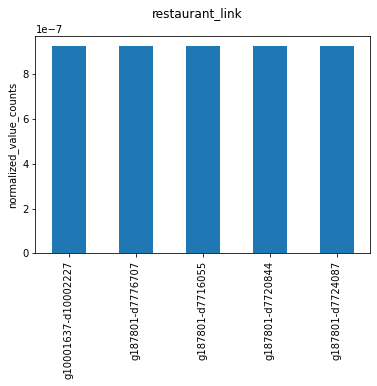

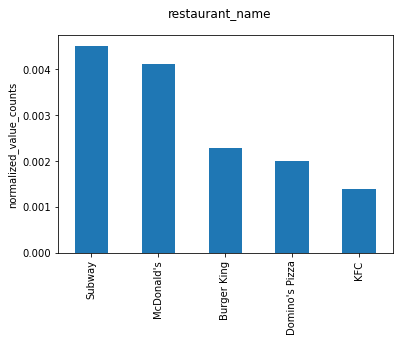

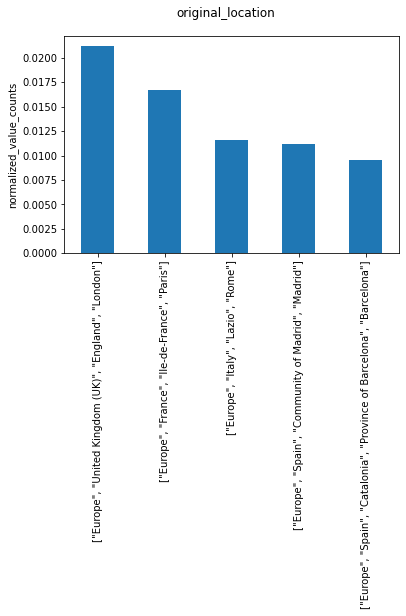

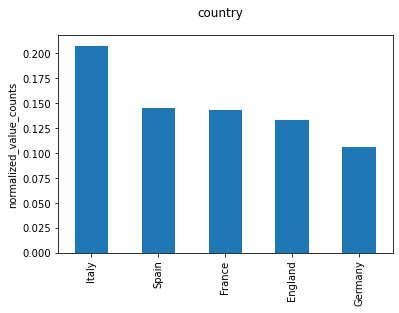

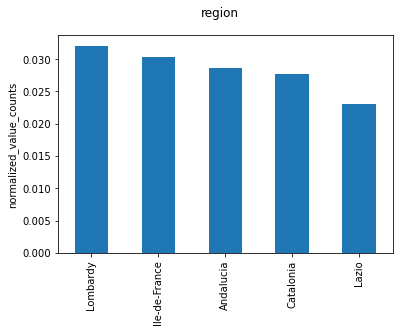

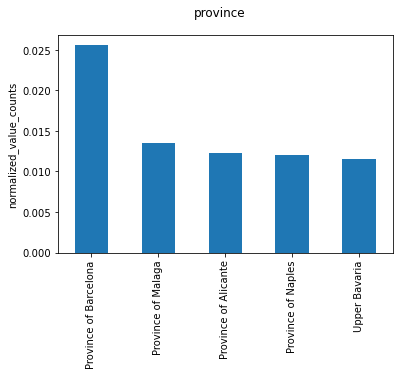

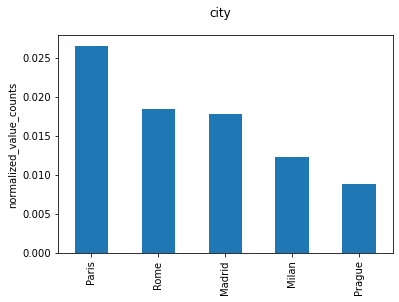

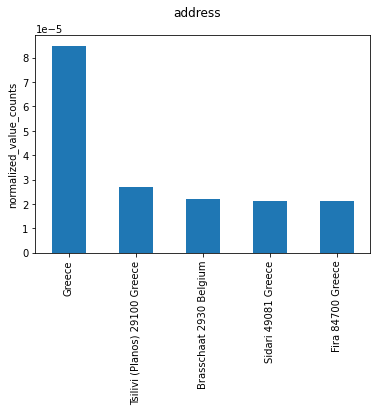

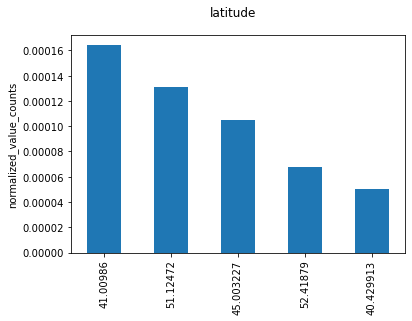

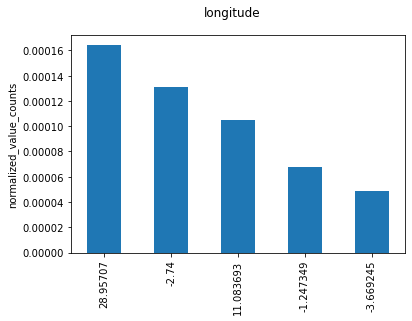

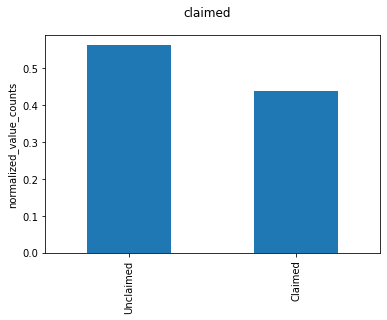

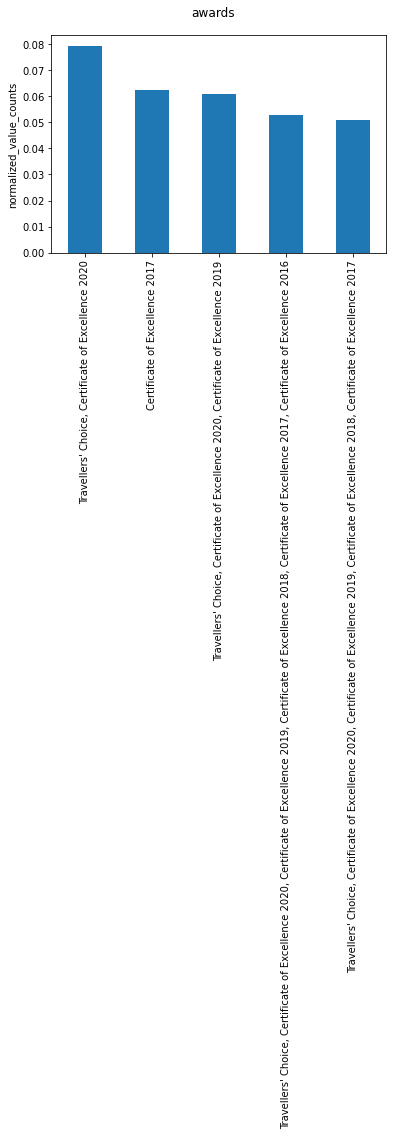

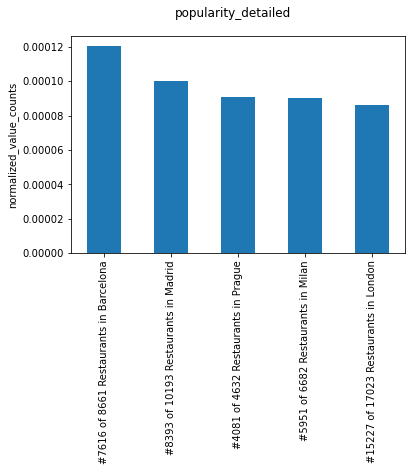

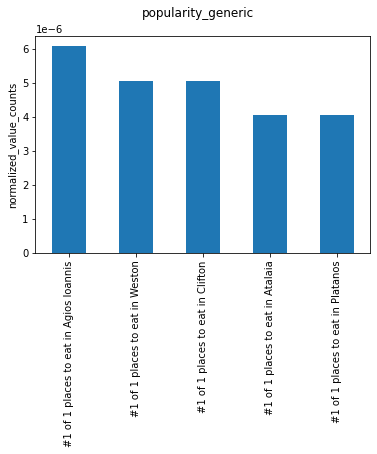

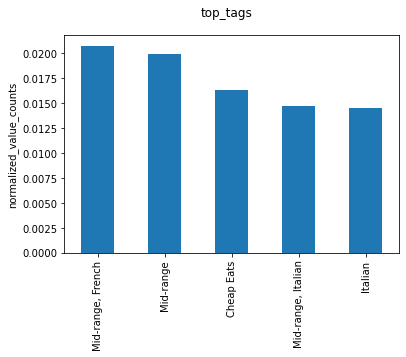

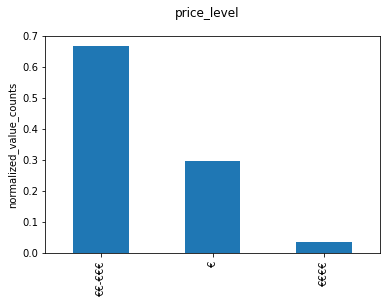

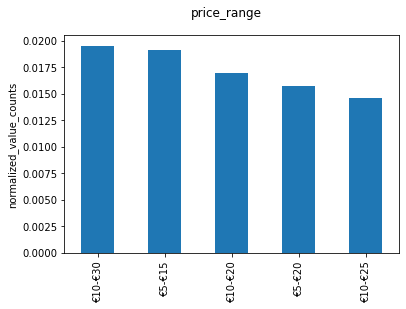

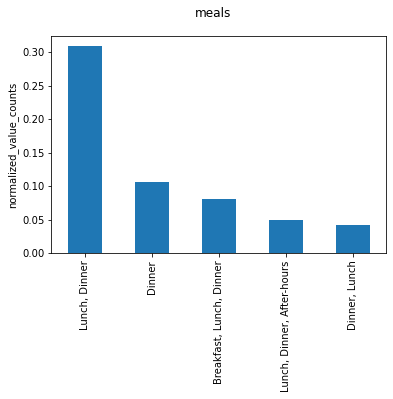

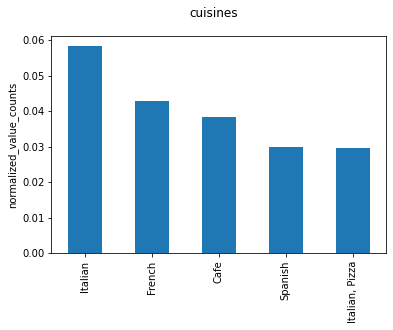

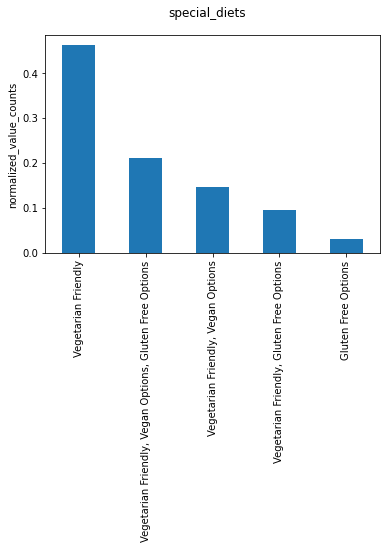

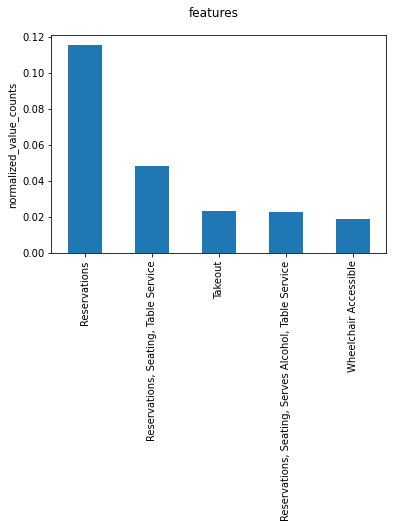

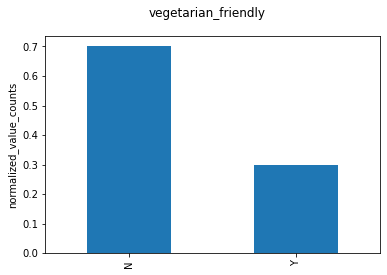

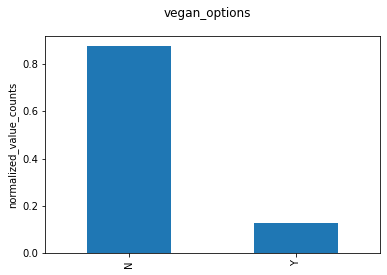

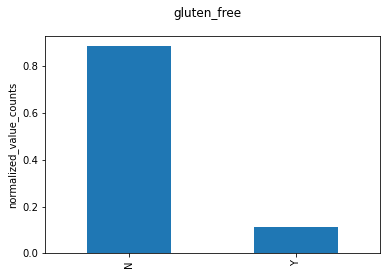

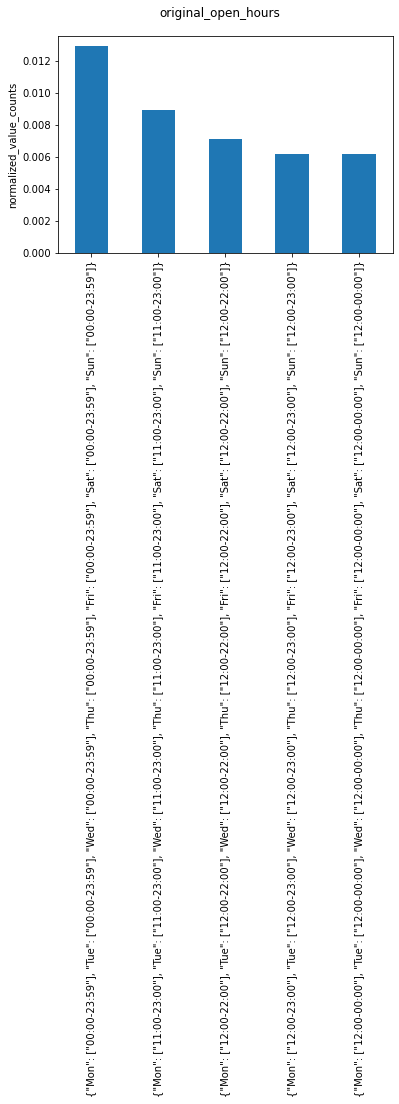

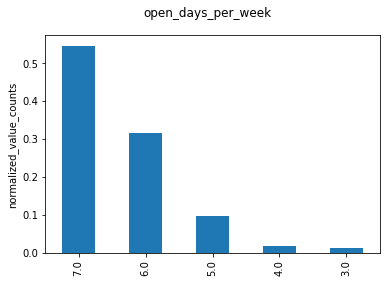

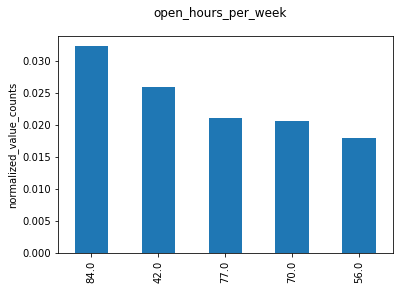

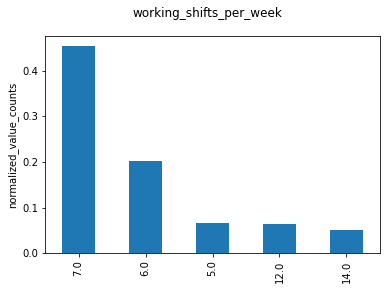

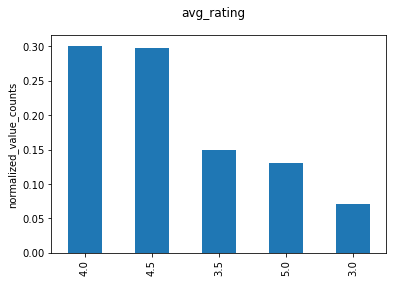

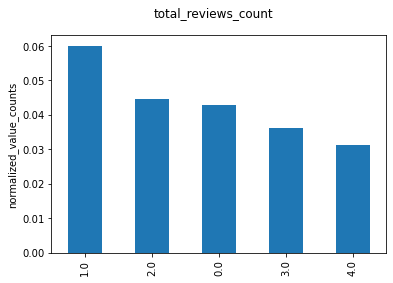

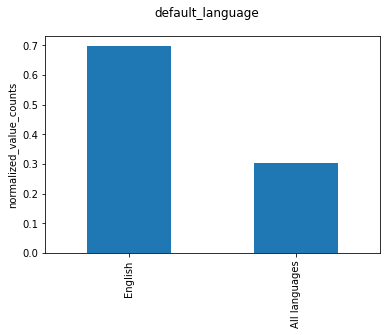

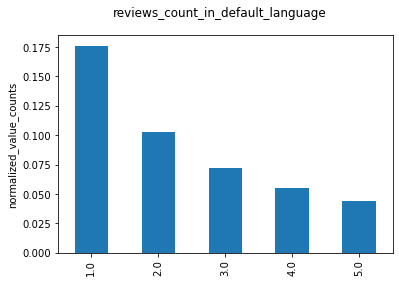

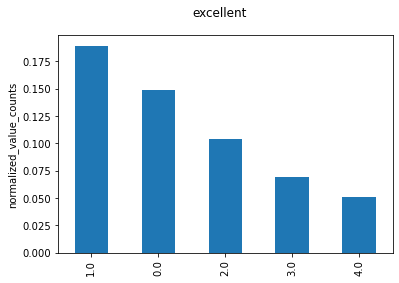

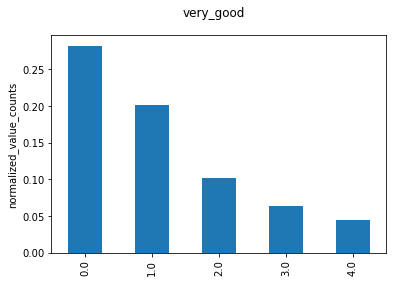

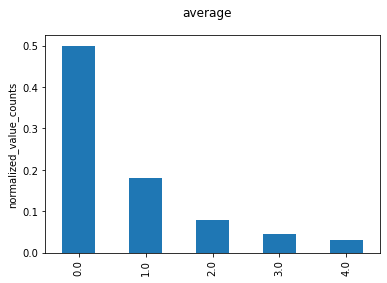

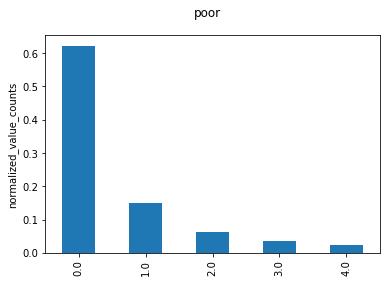

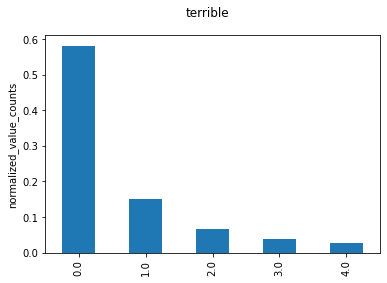

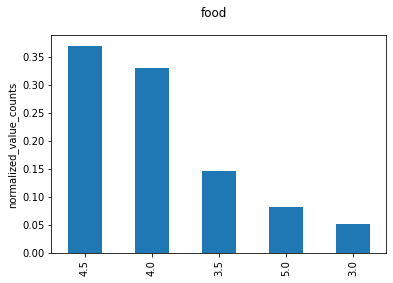

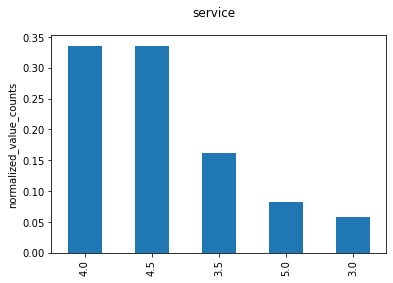

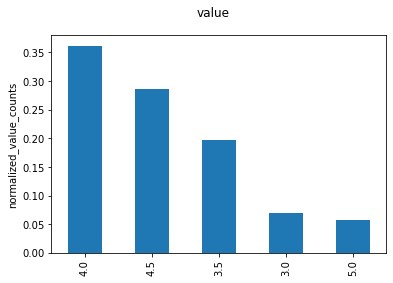

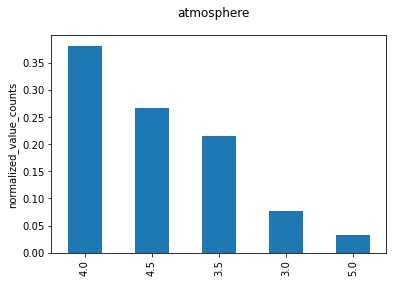

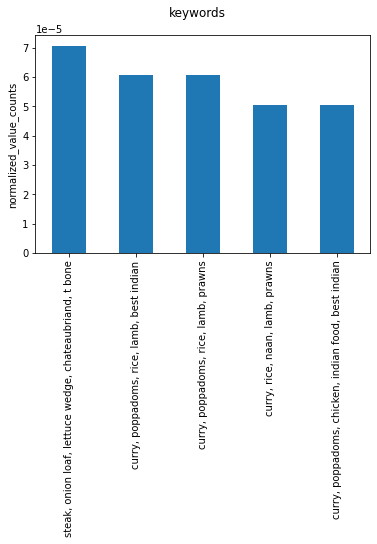

In [10]:
import matplotlib.pyplot as plt
for c in df.columns:
  value_counts = df[c].value_counts(normalize=True).head(5)
  value_counts.plot(kind='bar')
  unique_cnt = df[c]
  plt.ylabel("normalized_value_counts")
  plt.suptitle(str(c))
  plt.show()
  

In [11]:
for c in df.columns:
  print(c)
  print(df[c].value_counts(dropna=False))
  print(" ")

restaurant_link
g10001637-d10002227    1
g187801-d7776707       1
g187801-d7716055       1
g187801-d7720844       1
g187801-d7724087       1
                      ..
g187439-d7901240       1
g187439-d790546        1
g187439-d7912563       1
g187439-d7914791       1
g9867250-d14979687     1
Name: restaurant_link, Length: 1083397, dtype: int64
 
restaurant_name
Subway                   4881
McDonald's               4458
Burger King              2480
Domino's Pizza           2163
KFC                      1501
                         ... 
El Respiro                  1
Lizard                      1
Cafe Bariloche              1
Lateral Castellana 89       1
Casa Paduraru               1
Name: restaurant_name, Length: 840914, dtype: int64
 
original_location
["Europe", "United Kingdom (UK)", "England", "London"]                                       22942
["Europe", "France", "Ile-de-France", "Paris"]                                               18129
["Europe", "Italy", "Lazio", "Rome"]  

### DEALING WITH MISSING VALUES

In [12]:
missing_df = pd.DataFrame(100*(df.isnull().sum())/len(df), columns = ["missing_percentage"])
missing_df

,missing_percentage
restaurant_link,0.000000
restaurant_name,0.000000
original_location,0.000000
country,0.000000
region,4.644927
province,31.441106
city,36.984134
address,0.000000
latitude,1.457453
longitude,1.457453


In [13]:
# Remove columns that are higher than %50 missing value ratio . They may imputed them but it will cause high bias.

dropped_cols= missing_df.query("missing_percentage >50 ").index.tolist()
print(dropped_cols)
df.drop(columns = ['awards', 'price_range', 'special_diets', 'features', 'atmosphere', 'keywords'], inplace=True) 


# Remove records that have many missing values(at least 25 feature should be non-null)
df.dropna(thresh=25, axis=0, inplace=True)



['awards', 'price_range', 'special_diets', 'features', 'atmosphere', 'keywords']


In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
#for strings
imputer_mf = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
to_impute = ["province","city", "claimed", "popularity_detailed", "popularity_generic","top_tags", "price_level", "meals", "cuisines", "vegetarian_friendly", "vegan_options",
             'gluten_free', 'original_open_hours', 'default_language']
imputer_mf.fit(df[to_impute])
df[to_impute] = imputer_mf.transform(df[to_impute])


#for numeric values
#because avg_rating is seems to be  important feature, I will impute them using machine learning algorithm for more precise imputing. 
#It is exluded from simle imputer method
imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean')
to_impute=['latitude', 'longitude', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week',  'total_reviews_count',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value']

imputer_mean.fit(df[to_impute])
df[to_impute] = imputer_mean.transform(df[to_impute])


#KNN imputer
#I used all numerical values to predict avg_rating
from sklearn.impute import KNNImputer
to_impute= ['latitude', 'longitude', 'open_days_per_week', 'open_hours_per_week',
       'working_shifts_per_week',  "avg_rating", 'total_reviews_count',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value']
imputer_knn = KNNImputer(n_neighbors=2, missing_values = np.nan)
imputer_knn.fit_transform(df[to_impute])
df[to_impute] = imputer_knn.transform(df[to_impute])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954586 entries, 0 to 1083396
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    954586 non-null  object 
 1   restaurant_name                    954586 non-null  object 
 2   original_location                  954586 non-null  object 
 3   country                            954586 non-null  object 
 4   region                             911349 non-null  object 
 5   province                           954586 non-null  object 
 6   city                               954586 non-null  object 
 7   address                            954586 non-null  object 
 8   latitude                           954586 non-null  float64
 9   longitude                          954586 non-null  float64
 10  claimed                            954586 non-null  object 
 11  popularity_detailed                954

In [16]:
df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value
count,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000,954586.000000
mean,46.519335,5.732758,6.323716,61.606117,7.658942,4.041222,111.134411,46.042544,25.484179,10.834197,4.242364,2.432954,3.048850,4.104181,4.067248,3.982901
std,5.855164,8.599045,0.742295,23.259532,1.973920,0.701012,276.110205,151.109749,91.307454,36.082837,15.926077,9.506216,11.209799,0.447055,0.462465,0.458949
min,27.640310,-71.218094,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,41.924670,-0.851713,6.000000,52.000000,7.000000,3.500000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.982901
50%,46.519335,5.547690,6.323716,61.606117,7.658942,4.000000,29.000000,7.000000,4.000000,2.000000,1.000000,0.000000,0.000000,4.104181,4.067248,3.982901
75%,51.361879,12.087148,7.000000,65.000000,7.658942,4.500000,105.000000,27.000000,14.000000,7.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.000000
max,69.941560,33.369423,7.000000,168.000000,15.000000,5.000000,52404.000000,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000
